# Importing datasets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

true = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

In [2]:
true.drop(columns = ['subject','date'], inplace = True)
fake.drop(columns = ['subject','date'], inplace = True)

In [3]:
true_copy = true.copy()
fake_copy = fake.copy()

# Processing

In [4]:
stop_words =['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
true_copy['text'] = true_copy['text'].str.replace(pat, '')

stop_words =['/Getty Images']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
fake_copy['text'] = fake_copy['text'].str.replace(pat, '')

In [5]:
true_copy['title_length_char'] = true_copy.title.str.len()
true_copy['text_length_char'] = true_copy.text.str.len()
true_copy['title_length_words'] =  true_copy.title.str.split().str.len()
true_copy['text_length_words'] =  true_copy.text.str.split().str.len()

In [6]:
fake_copy['title_length_char'] = fake_copy.title.str.len()
fake_copy['text_length_char'] = fake_copy.text.str.len()
fake_copy['title_length_words'] =  fake_copy.title.str.split().str.len()
fake_copy['text_length_words'] =  fake_copy.text.str.split().str.len()


In [7]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
true_copy['title_punc'] = true_copy.title.apply(lambda s: count(s, string.punctuation))
true_copy['text_punc'] = true_copy.text.apply(lambda s: count(s, string.punctuation))
fake_copy['title_punc'] = fake_copy.title.apply(lambda s: count(s, string.punctuation))
fake_copy['text_punc'] = fake_copy.text.apply(lambda s: count(s, string.punctuation))

In [8]:
true_copy['title_punc_ratio'] = true_copy.title_punc / true_copy.title_length_char
true_copy.drop(columns = 'title_punc', inplace = True)
true_copy['text_punc_ratio'] = true_copy.text_punc / true_copy.text_length_char
true_copy.drop(columns = 'text_punc', inplace = True)

In [9]:
fake_copy['title_punc_ratio'] = fake_copy.title_punc / fake_copy.title_length_char
fake_copy.drop(columns = 'title_punc', inplace = True)
fake_copy['text_punc_ratio'] = fake_copy.text_punc / fake_copy.text_length_char
fake_copy.drop(columns = 'text_punc', inplace = True)

In [10]:
true_copy['title_Upper'] = true_copy['title'].str.count(r'[A-Z]')
true_copy['text_Upper'] = true_copy['text'].str.count(r'[A-Z]')
fake_copy['title_Upper'] = fake_copy['title'].str.count(r'[A-Z]')
fake_copy['text_Upper'] = fake_copy['text'].str.count(r'[A-Z]')

In [11]:
true_copy['title_lower_ratio'] = true_copy.title_Upper / true_copy.title_length_char
true_copy.drop(columns = 'title_Upper', inplace = True)
true_copy['text_lower_ratio'] = true_copy.text_Upper / true_copy.text_length_char
true_copy.drop(columns = 'text_Upper', inplace = True)

In [12]:
fake_copy['title_lower_ratio'] = fake_copy.title_Upper / fake_copy.title_length_char
fake_copy.drop(columns = 'title_Upper', inplace = True)
fake_copy['text_lower_ratio'] = fake_copy.text_Upper / fake_copy.text_length_char
fake_copy.drop(columns = 'text_Upper', inplace = True)

In [13]:
true_copy.head()

true_copy['text_lower_ratio'].mean()

0.04173569196078868

In [14]:
fake_copy.head()

fake_copy['text_lower_ratio'].mean()

0.045421477947712695

In [15]:
true_copy.head()



,title,text,title_length_char,text_length_char,title_length_words,text_length_words,title_punc_ratio,text_punc_ratio,title_lower_ratio,text_lower_ratio
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,64,4659,10,749,0.046875,0.025327,0.062500,0.033269
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,64,4077,9,624,0.046875,0.018886,0.062500,0.029188
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,60,2789,10,457,0.100000,0.016852,0.116667,0.041951
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,59,2461,9,376,0.033898,0.020723,0.135593,0.044697
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,69,5204,11,852,0.028986,0.026134,0.057971,0.038432


In [16]:
def count_digits(string):
    return sum(item.isdigit() for item in string)
true_copy['title_num'] = true_copy['title'].apply(count_digits)
true_copy['text_num'] = true_copy['text'].apply(count_digits)
fake_copy['title_num'] = fake_copy['title'].apply(count_digits)
fake_copy['text_num'] = fake_copy['text'].apply(count_digits)

In [17]:
true_copy['title_num_ratio'] = true_copy.title_num / true_copy.title_length_char
true_copy.drop(columns = 'title_num', inplace = True)
true_copy['text_num_ratio'] = true_copy.text_num / true_copy.text_length_char
true_copy.drop(columns = 'text_num', inplace = True)

In [18]:
fake_copy['title_num_ratio'] = fake_copy.title_num / fake_copy.title_length_char
fake_copy.drop(columns = 'title_num', inplace = True)
fake_copy['text_num_ratio'] = fake_copy.text_num / fake_copy.text_length_char
fake_copy.drop(columns = 'text_num', inplace = True)

# Data Visualization

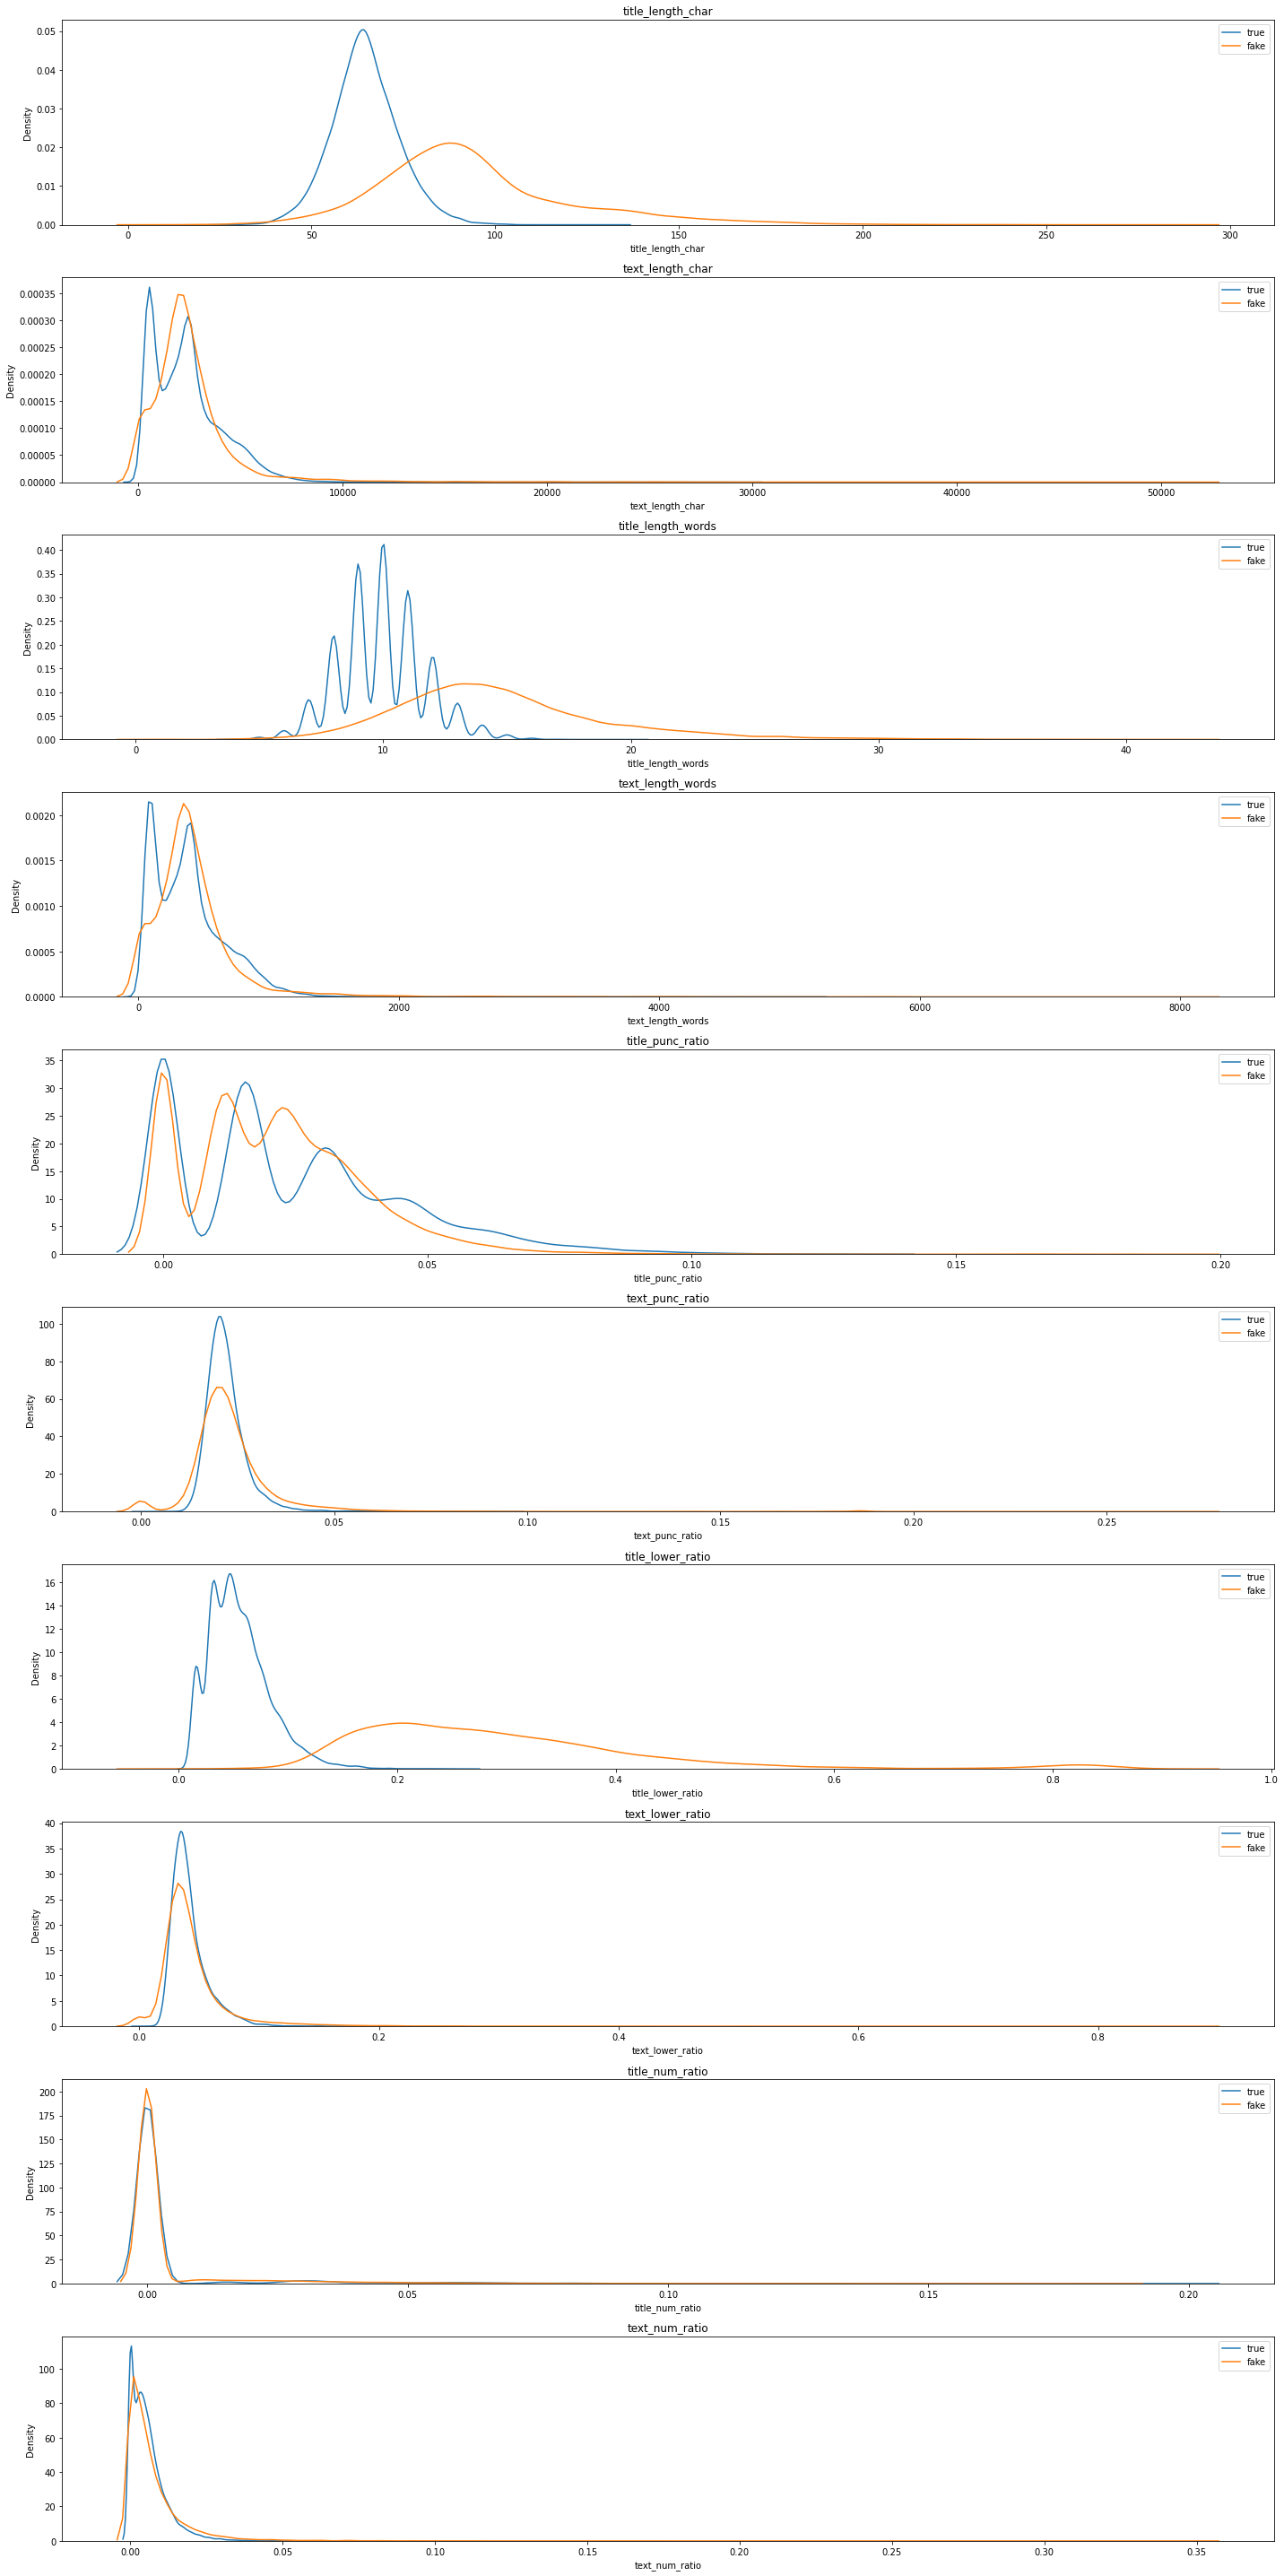

In [19]:
import seaborn as sns
ratio_columns = ['title_length_char', 'text_length_char',
       'title_length_words', 'text_length_words','title_punc_ratio',
       'text_punc_ratio', 'title_lower_ratio', 'text_lower_ratio',
       'title_num_ratio', 'text_num_ratio']
plt.figure(figsize=(20,40))
for index,column in enumerate(ratio_columns):
    plt.subplot(len(ratio_columns),1,index+1)
    plt.title(column)
    sns.kdeplot(true_copy[column] , label = 'true')
    sns.kdeplot(fake_copy[column], label = 'fake')
    plt.legend()
    plt.tight_layout()

# Starting a new model

In [20]:
true_copy['score'] = 1
fake_copy['score'] = 0

In [21]:
data = pd.concat([true_copy, fake_copy], ignore_index=True)

In [22]:
data.head()

,title,text,title_length_char,text_length_char,title_length_words,text_length_words,title_punc_ratio,text_punc_ratio,title_lower_ratio,text_lower_ratio,title_num_ratio,text_num_ratio,score
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,64,4659,10,749,0.046875,0.025327,0.062500,0.033269,0.0,0.007083,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,64,4077,9,624,0.046875,0.018886,0.062500,0.029188,0.0,0.003924,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,60,2789,10,457,0.100000,0.016852,0.116667,0.041951,0.0,0.002868,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,59,2461,9,376,0.033898,0.020723,0.135593,0.044697,0.0,0.004063,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,69,5204,11,852,0.028986,0.026134,0.057971,0.038432,0.0,0.011914,1


In [23]:
x = data.drop(columns = 'score')
y = data['score']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [25]:
data.columns

Index(['title', 'text', 'title_length_char', 'text_length_char',
       'title_length_words', 'text_length_words', 'title_punc_ratio',
       'text_punc_ratio', 'title_lower_ratio', 'text_lower_ratio',
       'title_num_ratio', 'text_num_ratio', 'score'],
      dtype='object')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
preprocessor = ColumnTransformer([
    ('vectorizer_title', CountVectorizer(), 'title'),
    ('vectorizer_text', CountVectorizer(), 'text'),
    ('MinMaxScaler', MinMaxScaler(), ['title_length_char', 'text_length_char',
       'title_length_words', 'text_length_words', 'title_punc_ratio',
       'text_punc_ratio', 'title_lower_ratio', 'text_lower_ratio',
       'title_num_ratio', 'text_num_ratio'])
])
final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('nb', MultinomialNB())])

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'preprocessing__vectorizer_title__ngram_range': ((1,1),(2,2),(3,3)),
    'preprocessing__vectorizer_text__ngram_range': ((1,1),(2,2),(3,3)),
    'nb__alpha': (0.1,1,2,5,10)}
grid_search = GridSearchCV(final_pipe,
                           parameters,
                           scoring = ["f1", "accuracy", "recall"],
                           refit= "accuracy",
                           cv=5,
                           verbose = 1)

In [28]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, fl

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nicolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X,

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('vectorizer_title', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', ...m_ratio', 'text_num_ratio'])])), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'preprocessing__vectorizer_title__ngram_range': ((1, 1), (2, 2), (3, 3)), 'preprocessing__vectorizer_text__ngram_range': ((1, 1), (2, 2), (3, 3)), 'nb__alpha': (0.1, 1, 2, 5, 10)},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['f1', 'accuracy', 'recall'],
       verbose=1)

In [30]:
tuned_pipe = grid_search.best_estimator_

In [31]:
tuned_pipe

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('vectorizer_title', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', ...num_ratio', 'text_num_ratio'])])), ('nb', MultinomialNB(alpha=2, class_prior=None, fit_prior=True))])

In [32]:
grid_search.best_params_

{'nb__alpha': 2,
 'preprocessing__vectorizer_text__ngram_range': (3, 3),
 'preprocessing__vectorizer_title__ngram_range': (1, 1)}

In [35]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nb__alpha,param_preprocessing__vectorizer_text__ngram_range,param_preprocessing__vectorizer_title__ngram_range,params,split0_test_f1,split1_test_f1,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,mean_train_recall,std_train_recall
0,7.979804,0.413291,5.903346,0.404570,0.1,"(1, 1)","(1, 1)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.960498,0.959293,...,0.955514,0.002382,31,0.972278,0.972363,0.972613,0.971531,0.972280,0.972213,3.623827e-04
1,8.185865,0.274894,5.631099,0.159097,0.1,"(1, 1)","(2, 2)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.961371,0.960307,...,0.958777,0.003340,29,0.985098,0.984350,0.984017,0.983351,0.983268,0.984017,6.758736e-04
2,8.295499,0.038779,5.552720,0.032515,0.1,"(1, 1)","(3, 3)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.959437,0.958153,...,0.959443,0.003457,28,0.986846,0.986931,0.986182,0.986098,0.985516,0.986315,5.225546e-04
3,27.495475,0.267550,11.104341,0.191281,0.1,"(2, 2)","(1, 1)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.978773,0.976729,...,0.977957,0.001713,18,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,2.772000e-09
4,28.062319,0.242174,11.122678,0.092602,0.1,"(2, 2)","(2, 2)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.978979,0.976914,...,0.978956,0.001139,17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,28.197046,0.527248,11.299468,0.239662,0.1,"(2, 2)","(3, 3)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.978333,0.975286,...,0.979289,0.001319,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,51.210352,0.398298,11.626054,0.066286,0.1,"(3, 3)","(1, 1)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.980386,0.980159,...,0.986148,0.002625,8,1.000000,1.000000,1.000000,0.999917,0.999917,0.999967,4.078065e-05
7,258.678082,413.961165,11.883699,0.240047,0.1,"(3, 3)","(2, 2)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.980392,0.980502,...,0.986481,0.002574,7,1.000000,1.000000,1.000000,1.000000,0.999917,0.999983,3.329726e-05
8,52.109295,0.106528,11.673963,0.082812,0.1,"(3, 3)","(3, 3)","{'nb__alpha': 0.1, 'preprocessing__vectorizer_...",0.978124,0.977609,...,0.986947,0.002589,3,1.000000,1.000000,1.000000,1.000000,0.999917,0.999983,3.329726e-05
9,7.566612,0.162881,5.697477,0.285856,1,"(1, 1)","(1, 1)","{'nb__alpha': 1, 'preprocessing__vectorizer_te...",0.956944,0.954712,...,0.955381,0.002633,32,0.965951,0.965621,0.966037,0.964955,0.966120,0.965737,4.261267e-04


In [36]:
results = pd.DataFrame(grid_search.cv_results_)

In [38]:
results.iloc[24]

mean_fit_time                                                                                   51.8635
std_fit_time                                                                                   0.216487
mean_score_time                                                                                 11.4286
std_score_time                                                                                0.0758789
param_nb__alpha                                                                                       2
param_preprocessing__vectorizer_text__ngram_range                                                (3, 3)
param_preprocessing__vectorizer_title__ngram_range                                               (1, 1)
params                                                {'nb__alpha': 2, 'preprocessing__vectorizer_te...
split0_test_f1                                                                                 0.985129
split1_test_f1                                                  

In [ ]:
import pickle
# Export pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(tuned_pipe, file )